In [1]:
# Generating Random Data

import pandas as pd
import numpy as np

# Define regions
regions = ['North', 'South', 'East', 'West']

# Define product categories
product_categories = ['Fruits', 'Vegetables', 'Dairy', 'Grains', 'Meat', 'Snacks']

# Define population density levels
population_densities = ['High', 'Medium', 'Low']

# Define income levels
income_levels = ['High', 'Medium', 'Low']

# Define climate types
climate_types = ['Tropical', 'Temperate', 'Continental', 'Polar']

# Define seasons
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

# Generate random dataset
data = []
for region in regions:
    for category in product_categories:
        for density in population_densities:
            for income in income_levels:
                for climate in climate_types:
                    for season in seasons:
                        sales = np.random.randint(1000, 10000)
                        data.append([region, category, density, income, climate, season, sales])

df = pd.DataFrame(data, columns=['Region', 'Product Category', 'Population Density', 'Income Level', 'Climate', 'Season', 'Sales'])
df.to_csv('food_consumption.csv', index=False)
print("Random dataset generated and saved as 'food_consumption.csv'")

Random dataset generated and saved as 'food_consumption.csv'


  Region Product Category Population Density Income Level    Climate  Season  \
0  North           Fruits               High         High   Tropical  Spring   
1  North           Fruits               High         High   Tropical  Summer   
2  North           Fruits               High         High   Tropical  Autumn   
3  North           Fruits               High         High   Tropical  Winter   
4  North           Fruits               High         High  Temperate  Spring   

   Sales  
0   3181  
1   6771  
2   2117  
3   9687  
4   5234  
             Sales
count  3456.000000
mean   5495.040220
std    2589.873313
min    1004.000000
25%    3263.750000
50%    5473.000000
75%    7761.000000
max    9994.000000


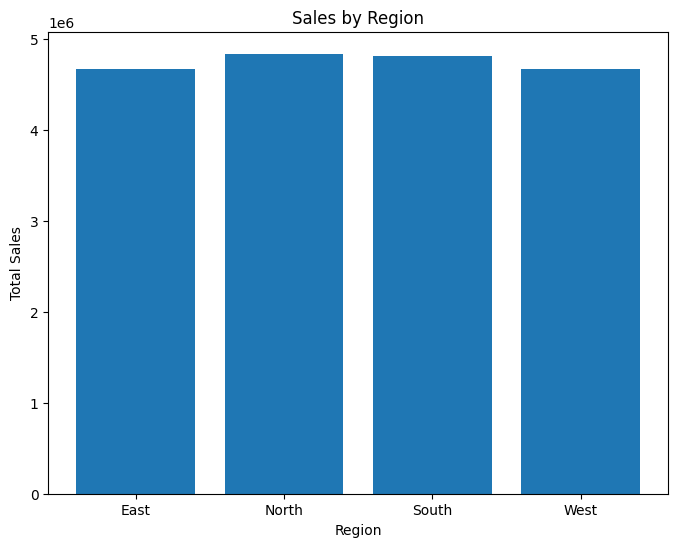

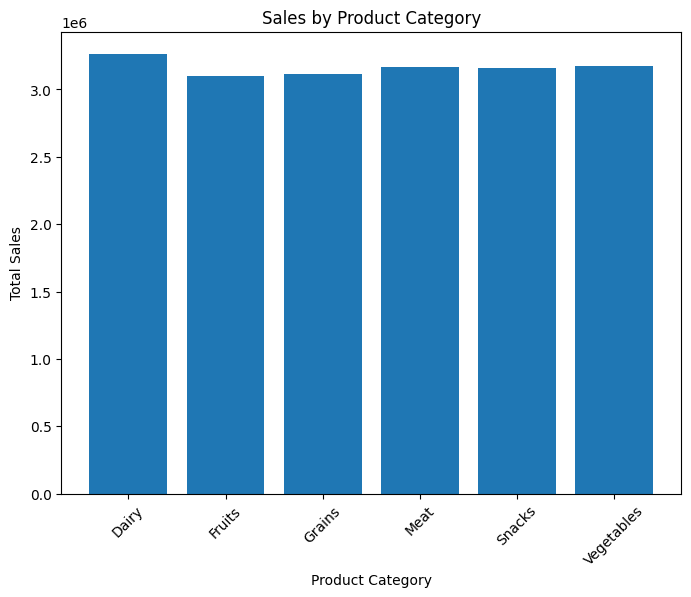

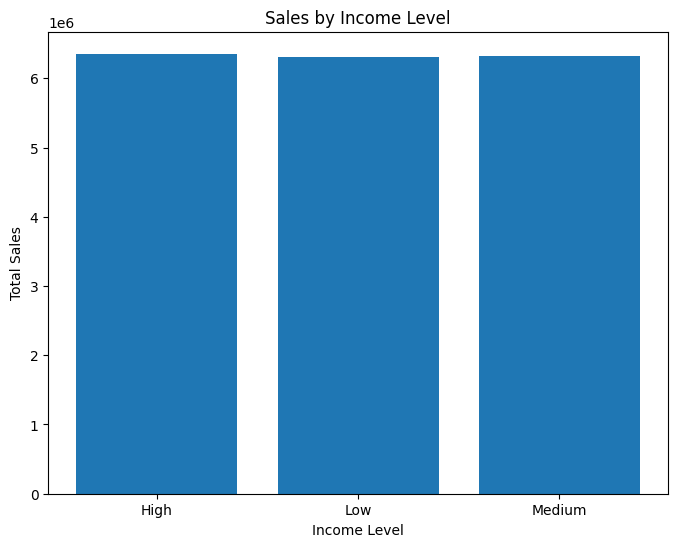

In [2]:
# Exploratory Data Analysis and Visualization

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('food_consumption.csv')

# Exploratory Data Analysis
print(df.head())
print(df.describe())

# Visualize sales by region
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(region_sales['Region'], region_sales['Sales'])
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales by Region')
plt.show()

# Visualize sales by product category
category_sales = df.groupby('Product Category')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(category_sales['Product Category'], category_sales['Sales'])
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.title('Sales by Product Category')
plt.show()

# Visualize sales by other factors (e.g., income level, climate)
income_sales = df.groupby('Income Level')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(income_sales['Income Level'], income_sales['Sales'])
plt.xlabel('Income Level')
plt.ylabel('Total Sales')
plt.title('Sales by Income Level')
plt.show()

In [3]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163002 sha256=4636ae8a83431141944288a9a1d759f30db7e7200fa0279060f6cd5e41e9a710
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [4]:
# Recommendation System using Collaborative Filtering

import pandas as pd
from surprise import Reader, Dataset, SVD

# Load the dataset
df = pd.read_csv('food_consumption.csv')

# Combine columns to create a single item ID
df['ItemID'] = df['Region'] + '_' + df['Product Category'] + '_' + df['Population Density'] + '_' + df['Income Level'] + '_' + df['Climate'] + '_' + df['Season']

# Prepare the data for the surprise library
reader = Reader(rating_scale=(0, 10000))
data = Dataset.load_from_df(df[['Region', 'ItemID', 'Sales']], reader)

# Split the data into training and testing sets
trainset = data.build_full_trainset()

# Train the SVD model
algo = SVD()
algo.fit(trainset)

# Make predictions for each region and item combination
predictions = []
for region in df['Region'].unique():
    for item_id in df['ItemID'].unique():
        prediction = algo.predict(region, item_id)
        predictions.append([region, item_id, prediction.est])

# Create a DataFrame from the predictions
recommendations = pd.DataFrame(predictions, columns=['Region', 'ItemID', 'Predicted Sales'])

# Sort the recommendations by predicted sales in descending order
recommendations = recommendations.sort_values(by='Predicted Sales', ascending=False)

# Display the top recommendations for each region
for region in df['Region'].unique():
    print(f"\nTop Recommendations for {region}:")
    print(recommendations[recommendations['Region'] == region].head(3))


Top Recommendations for North:
     Region                                  ItemID  Predicted Sales
0     North  North_Fruits_High_High_Tropical_Spring            10000
1     North  North_Fruits_High_High_Tropical_Summer            10000
2295  North    East_Grains_Low_Low_Temperate_Winter            10000

Top Recommendations for South:
     Region                                  ItemID  Predicted Sales
6911  South        West_Snacks_Low_Low_Polar_Winter            10000
3456  South  North_Fruits_High_High_Tropical_Spring            10000
6910  South        West_Snacks_Low_Low_Polar_Autumn            10000

Top Recommendations for East:
     Region                                  ItemID  Predicted Sales
9220   East    East_Meat_High_High_Temperate_Spring            10000
9209   East  East_Grains_Low_Low_Continental_Summer            10000
9210   East  East_Grains_Low_Low_Continental_Autumn            10000

Top Recommendations for West:
      Region                                  

In [5]:
# Sales Forecasting using Random Forest Regression

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('food_consumption.csv')

# Encode categorical features
df = pd.get_dummies(df, columns=['Region', 'Product Category', 'Population Density', 'Income Level', 'Climate', 'Season'])

# Split the data into features and target
X = df.drop('Sales', axis=1)
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
score = model.score(X_test, y_test)
print(f"R-squared score: {score:.2f}")

# Make predictions on the test set
y_pred = model.predict(X_test)
print("Predicted Sales:\n", y_pred[:10])

R-squared score: -0.13
Predicted Sales:
 [4595.43 5307.43 5967.43 3353.04 4581.51 6365.9  4937.24 6686.53 4163.8
 5002.5 ]


In [6]:
# K-Means for Clustering of Consumers

import pandas as pd
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('food_consumption.csv')

# Preprocess the data for clustering (including encoding categories)
X = df[['Population Density', 'Income Level']]
X = pd.get_dummies(X, drop_first=True)  # Encode categories numerically

# Rename and convert data types (if needed)
X.columns = [f'col_{i}' for i in range(len(X.columns))]
X = X.astype(float)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Add cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Print the cluster centers
print(kmeans.cluster_centers_)

# Print the inertia
print(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 3.33333333e-01 -1.88737914e-15  6.66666667e-01 -1.88737914e-15]
 [ 1.60982339e-15  5.00000000e-01  1.60982339e-15  1.00000000e+00]
 [ 1.00000000e+00  1.94289029e-15  1.94289029e-15  5.00000000e-01]
 [ 1.60982339e-15  1.00000000e+00  5.00000000e-01  1.60982339e-15]]
1087.9999999999927


In [7]:
# Market Basket Analysis

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
data = pd.read_csv('food_consumption.csv')

# Update the basket_columns list to match the actual column names in the data DataFrame
basket_columns = data.columns

# Convert the data into a one-hot encoded format
basket = data[basket_columns].applymap(lambda x: 1 if x else 0)

# Perform Apriori analysis
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Print the frequent itemsets
print(frequent_itemsets)

# Print the association rules
print(rules)

     support                                           itemsets
0        1.0                                           (Region)
1        1.0                                 (Product Category)
2        1.0                               (Population Density)
3        1.0                                     (Income Level)
4        1.0                                          (Climate)
..       ...                                                ...
122      1.0  (Population Density, Sales, Product Category, ...
123      1.0  (Income Level, Sales, Product Category, Climat...
124      1.0  (Income Level, Population Density, Sales, Clim...
125      1.0  (Income Level, Population Density, Sales, Prod...
126      1.0  (Income Level, Population Density, Sales, Prod...

[127 rows x 2 columns]
               antecedents                                        consequents  \
0       (Product Category)                                           (Region)   
1                 (Region)                    

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [8]:
import pandas as pd
import numpy as np

# Define online shopping portals
portals = ['BigBasket', 'Amazon', 'Flipkart', 'Grofers']

# Define product categories
product_categories = ['Fruits', 'Vegetables', 'Dairy', 'Grains', 'Meat', 'Snacks']

# Define product brands
brands = ['Brand A', 'Brand B', 'Brand C', 'Brand D', 'Brand E']

# Define delivery locations
locations = ['North', 'South', 'East', 'West']

# Define ratings
ratings = [1, 2, 3, 4, 5]

# Define discount levels
discount_levels = ['Low', 'Medium', 'High']

# Generate random dataset
data = []
for portal in portals:
    for category in product_categories:
        for brand in brands:
            for location in locations:
                for rating in ratings:
                    for discount in discount_levels:
                        price = np.random.randint(50, 500)
                        orders = np.random.randint(100, 5000)
                        data.append([portal, category, brand, location, rating, discount, price, orders])

df = pd.DataFrame(data, columns=['Portal', 'Product Category', 'Brand', 'Location', 'Rating', 'Discount Level', 'Price', 'Orders'])

# Save the dataset to a CSV file
df.to_csv('online_shopping_data.csv', index=False)
print("Random dataset generated and saved as 'online_shopping_data.csv'")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Random dataset generated and saved as 'online_shopping_data.csv'


In [17]:



import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Load the dataset
df = pd.read_csv('food_consumption.csv')
online_shopping_data = pd.read_csv('online_shopping_data.csv')


# Print unique values in the combined_data DataFrame
print("Available Regions:")
print(combined_data['Region'].unique())

print("\nAvailable Brands:")
print(combined_data['Brand'].unique())

print("\nAvailable Product Categories:")
print(combined_data['Product Category'].unique())

# Get user input
shopkeeper_region = input("Enter your region: ")
targeted_region = input("Enter the targeted region: ")
targeted_brand = input("Enter the targeted brand: ")
product_category = input("Enter the product category: ")

# Combine the datasets
combined_data = pd.concat([df, online_shopping_data], ignore_index=True)

# Create a 'Product Description' column for the online shopping data
product_descriptions = [
    f"{category} {brand}" for category, brand in zip(combined_data['Product Category'], combined_data['Brand'])
]
combined_data['Product Description'] = product_descriptions

# Handle NaN values in the 'Product Description' column
combined_data['Product Description'] = combined_data['Product Description'].fillna('Missing')

# Create a TF-IDF matrix from the product descriptions
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(combined_data['Product Description'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_recommendations(shopkeeper_region, targeted_region, targeted_brand, product_category, cosine_sim=cosine_sim, data=combined_data, top_n=10):
    product_desc = f"{product_category} {targeted_brand}"
    filtered_data = data[(data['Region'] == shopkeeper_region) & (data['Brand'] == targeted_brand) & (data['Product Description'] == product_desc)]

    if not filtered_data.empty:
        idx = filtered_data.index[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:top_n+1]
        product_indices = [i[0] for i in sim_scores if combined_data.iloc[i[0]]['Region'] == targeted_region]
        recommendations = combined_data.iloc[product_indices]
        recommendations = recommendations[recommendations['Brand'] == targeted_brand]
        return recommendations
    else:
        return pd.DataFrame(columns=['Product Category', 'Brand', 'Product Description', 'Region'])

print(recommendations[['Product Category', 'Brand', 'Product Description', 'Region']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Available Regions:
['North' 'South' 'East' 'West' nan]

Available Brands:
[nan 'Brand A' 'Brand B' 'Brand C' 'Brand D' 'Brand E']

Available Product Categories:
['Fruits' 'Vegetables' 'Dairy' 'Grains' 'Meat' 'Snacks']
Enter your region: North
Enter the targeted region: South
Enter the targeted brand: Brand A
Enter the product category: Vegetables
     Product Category    Brand Product Description Region
3757       Vegetables  Brand A  Vegetables Brand A    NaN
3758       Vegetables  Brand A  Vegetables Brand A    NaN
3759       Vegetables  Brand A  Vegetables Brand A    NaN
3760       Vegetables  Brand A  Vegetables Brand A    NaN
3761       Vegetables  Brand A  Vegetables Brand A    NaN
3762       Vegetables  Brand A  Vegetables Brand A    NaN
3763       Vegetables  Brand A  Vegetables Brand A    NaN
3764       Vegetables  Brand A  Vegetables Brand A    NaN
3765       Vegetables  Brand A  Vegetables Brand A    NaN
3766       Vegetables  Brand A  Vegetables Brand A    NaN
